## Introduction

**Project Description**

The gym chain Model Fitness is developing a customer interaction strategy based on analytical data.
One of the most common problems gyms and other services face is customer churn. How do you know if a customer is no longer with you? You can **calculate churn based on people** who get rid of their accounts or don't renew their contracts. However, sometimes it's not obvious that a client has left: they may walk out on tiptoes.

**Churn indicators vary from field to field**. If a user buys from an online store rarely but regularly, you can't say they're a runaway. But if for two weeks they haven't opened a channel that's updated daily, that's a reason to worry: your follower might have gotten bored and left you.

For a gym, it makes sense to say a **customer has left if they don't come for a month.** Of course, it's possible they're in Cancun and will resume their visits when they return, but's that's not a typical case. Usually, if a customer joins, comes a few times, then disappears, they're unlikely to come back. In order to fight churn, Model Fitness has digitized a number of its customer profiles. Your task is to **analyze them and come up with a customer retention strategy.**

You should:
1. Learn to predict the probability of churn (for the upcoming month) for each customer
2. Draw up typical user portraits: select the most outstanding groups and describe their main features
3. Analyze the factors that impact churn most
4. Draw basic conclusions and develop recommendations on how to improve customer service:
    - Identify target groups
    - Suggest measures to cut churn
    - Describe any other patterns you see with respect to interaction with customers

## Data Exploration

Firstly we import necessary library for our analysis

### Import Library

In [1]:
import pandas as pd
import numpy as np

import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

Next, we read the data using in-built funtion of pandas

### Load Data

In [2]:
data = pd.read_csv('/datasets/gym_churn_us.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

The provided information is a brief summary of a DataFrame in Python's pandas library. Here are the details of the DataFrame:

- The DataFrame contains 4000 entries or rows.
- There are 14 columns in the DataFrame, each representing a different attribute or feature.
- The columns and their descriptions are as follows:
    1. gender: Represents the gender of the customers (0 - female, 1 - male).
    2. Near_Location: Indicates whether the customer's workplace or residence is near the gym (0 - not near, 1 - near).
    3. Partner: Indicates if the customer is a partner company employee (0 - not a partner, 1 - partner).
    4. Promo_friends: Indicates if the customer was brought in by a friend (0 - not through a friend, 1 - through a friend).
    5. Phone: Indicates if the customer provided a phone number (0 - no phone, 1 - phone provided).
    6. Contract_period: Represents the duration of the customer's contract in months.
    7. Group_visits: Indicates if the customer participates in group sessions (0 - no, 1 - yes).
    8. Age: Represents the age of the customer.
    9. Avg_additional_charges_total: Represents the total amount of additional charges paid by the customer.
    10. Month_to_end_contract: Represents the number of months remaining until the contract expires.
    11. Lifetime: Represents the number of months the customer has been a member.
    12. Avg_class_frequency_total: Represents the average frequency of visits per week in the customer's lifetime.
    13. Avg_class_frequency_current_month: Represents the average frequency of visits per week in the current month.
    14. Churn: Indicates if the customer has churned or not (0 - active, 1 - churned).

This DataFrame contains customer data for a gym or fitness center, with various features that could be used for analysis or prediction purposes, such as predicting customer churn.

from `data.info()` we found that there are no missing values in our dataset. The provided data can be considered suitable for machine learning tasks, especially for predictive modeling and classification tasks such as predicting customer churn. 

In [4]:
data.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


Based on the information provided by the describe() function, here are some observations and insights we can gather about the DataFrame:

- Gender: The majority of customers in the dataset are female, as the mean value for gender is approximately 0.51.

- Near_Location: Around 84.5% of the customers have their workplace or residence near the gym, as indicated by the mean value of 0.845.

- Partner: Roughly 48.7% of the customers are employees of partner companies, with a mean value of 0.487.

- Promo_friends: About 30.9% of the customers joined the gym through a friend's recommendation, as indicated by the mean value of 0.3085.

- Phone: The vast majority of customers (90.4%) provided their phone numbers, as indicated by the mean value of 0.9035.

- Contract_period: The average contract duration is around 4.68 months, indicating some variability in the contract lengths.

- Group_visits: Approximately 41.2% of the customers participate in group sessions, as indicated by the mean value of 0.412.

- Age: The average age of the customers is approximately 29.18 years. The minimum age is 18, and the maximum age is 41.

- Avg_additional_charges_total: On average, customers incur additional charges totaling around 146.94 currency units, with a wide range of values indicated by the standard deviation of 96.36.

- Month_to_end_contract: The average number of months remaining until the contract expires is approximately 4.32.

- Lifetime: The average customer lifetime is around 3.72 months. The minimum lifetime is 0, indicating some new customers, and the maximum lifetime is 31 months.

- Avg_class_frequency_total: On average, customers visit the gym approximately 1.88 times per week over their membership lifetime, with a standard deviation of 0.97.

- Avg_class_frequency_current_month: The average frequency of visits per week in the current month is approximately 1.77, with a standard deviation of 1.05.

- Churn: The mean churn rate is approximately 0.27, indicating that around 27% of the customers in the dataset have churned. That display a very poor churn rate.

These observations provide a high-level understanding of the dataset's characteristics and can serve as a starting point for further analysis and exploration.

### Check Missing Values

In [5]:
missing_values = data.isnull().sum()
print(missing_values)

gender                               0
Near_Location                        0
Partner                              0
Promo_friends                        0
Phone                                0
Contract_period                      0
Group_visits                         0
Age                                  0
Avg_additional_charges_total         0
Month_to_end_contract                0
Lifetime                             0
Avg_class_frequency_total            0
Avg_class_frequency_current_month    0
Churn                                0
dtype: int64


No missing values. Turns great for our analysis later on

In [6]:
data.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


we need to syncronise the column name. we will convert it to lower case.

Check for duplicated values.

In [7]:
duplicates = data.duplicated()
print(duplicates.count())
duplicate_count = duplicates.sum()
print(f"Total number of duplicate rows: {duplicate_count}")

4000
Total number of duplicate rows: 0


## Enrich Data

### Change Column Name to lowercase

To convert the column names to lowercase in the DataFrame, we can use the lower() method along with the rename() method. Here's how we can do it:

In [8]:
data.columns = data.columns.str.lower()
display(data.head())

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


## Carry out exploratory data analysis (EDA) &#x2713;

To effectively address customer retention at Model Fitness, as a data analyst, the initial step involves conducting exploratory data analysis (EDA) on the provided customer profiles. This involves several key actions:

- Identifying missing values and examining the central tendencies and variabilities of the data using the `describe()` method. This analysis provides insights into the dataset's distribution and allows for a better understanding of the data's characteristics. 

- Grouping the data into two categories: churned customers and retained customers. By employing the `groupby()` method, the mean feature values for each group can be examined. This comparison enables a deeper analysis of the distinguishing features between customers who have left and those who have stayed.

- Utilizing bar histograms and feature distributions to visualize the data for both churned and retained customers. This visualization aids in identifying potential patterns or trends that may be relevant to churn and retention. By visually comparing the distributions, potential factors influencing churn can be explored.

- Constructing a correlation matrix to assess the relationships between different variables in the dataset. This matrix provides insights into the strength and direction of the relationships, allowing for the identification of key factors that may be linked to customer churn.

By conducting these analyses, data analysts can gain valuable insights into the factors impacting customer churn at Model Fitness, facilitating the development of an effective customer retention strategy.


### Grouping the data into two categories (By Churn)

Since we already did `data.describe()` and have the overview of it we proceed to the grouping for customer churn

In [9]:
# Grouping the data by the 'Churn' column
grouped_data = data.groupby('churn')

# Calculating the mean feature values for each group
mean_values = grouped_data.mean()

# Displaying the mean feature values for each group
display(mean_values)

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


The provided data shows the mean values of various features grouped by the `Churn` column, which represents whether a customer has churned (1) or not (0). Here are some key findings based on the provided data:

- Gender: The mean values for gender are similar for both churned and retained customers, with approximately 51% male and 49% female in both groups.

- Near_Location: Retained customers have a higher proportion (87.3%) of being located near the gym compared to churned customers (76.8%). **This suggests that proximity to the gym may have an impact on customer retention.**

- Partner: Retained customers have a higher proportion (53.4%) of having a partner compared to churned customers (35.5%). This indicates that having a partner may **contribute to higher customer retention rates.**

- Promo_friends: Retained customers have a higher proportion (35.4%) of being referred by a friend compared to churned customers (18.4%). Word-of-mouth referrals from friends may **play a role in customer retention.**

- Phone: Both churned and retained customers have a similar proportion (around 90%) of providing their phone number. Phone number availability doesn't appear to have a significant impact on churn.

- Contract_period: Retained customers have a longer average contract period (5.7 months) compared to churned customers (1.7 months). Longer contract periods might indicate a **higher commitment and likelihood of customer retention.**

- Group_visits: Retained customers have a higher proportion (46.4%) of participating in group visits compared to churned customers (26.9%). Group participation **might contribute to a sense of community and engagement, leading to higher retention rates.**

- Age: The mean age is slightly higher for retained customers (approximately 30 years) compared to churned customers (approximately 27 years).

- Avg_additional_charges_total: Retained customers have higher average additional charges compared to churned customers, indicating that they might be more engaged in additional services offered by the gym.

- Month_to_end_contract: Retained customers have a longer average time until the end of the contract compared to churned customers.

- Lifetime: Retained customers have a longer average customer lifetime compared to churned customers.

- Avg_class_frequency_total: Retained customers have a higher average frequency of class attendance compared to churned customers.

- Avg_class_frequency_current_month: Retained customers have a higher average frequency of class attendance in the current month compared to churned customers.

These findings suggest that factors such as proximity to the gym, having a partner, participating in group visits, longer contract periods, higher additional charges, and higher class attendance may contribute to customer retention. It would be beneficial to further investigate and analyze these factors to develop targeted strategies for reducing churn and improving customer retention.

## Bar histograms and Feature distributions 

Here we split the churn and stayed customer and check the pattern based on bar histogram.

### Churn customer distribution

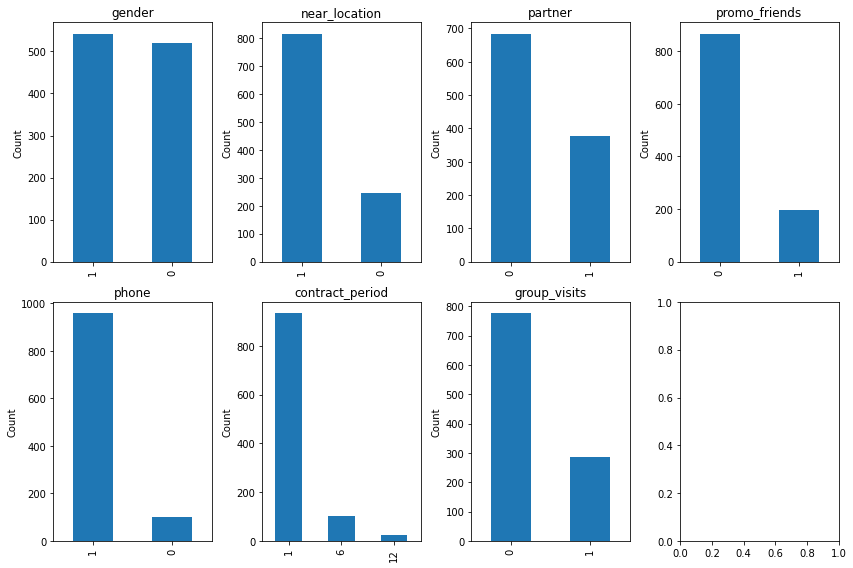

In [10]:
# Filter the data for churned customers
churned_data = data[data['churn'] == 1]

# Features of interest
features = ['gender', 'near_location', 'partner', 'promo_friends', 'phone', 'contract_period', 'group_visits']

# Number of rows and columns for subplots
rows = 2
cols = 4

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(12, 8))

# Flatten axes into a 1D array
axes = axes.flatten()

# Plot bar histograms for each feature
for i, feature in enumerate(features):
    ax = axes[i]
    churned_data[feature].value_counts().plot(kind='bar', ax=ax)
    ax.set_title(feature)
    ax.set_xlabel('')
    ax.set_ylabel('Count')
    ax.grid(False)

# Adjust spacing between subplots
fig.tight_layout()

# Display the plot
plt.show()

Based on the bar histograms plotted for the churned customers (churned_data), the key findings are as follows:

1. Gender: The count of churned customers is roughly equal for both genders.

2. Near_Location: Churned customers who were near the gym location are more prevalent compared to those who were not near the gym.

3. Partner: Churned customers who did not have a partner are more common than those who had a partner.

4. Promo_friends: Churned customers who did not join via a 'promo_friends' offer are more frequent than those who did.

5. Phone: The majority of churned customers provided their phone number.

6. Contract_period: Churned customers mostly had short contract periods, with the highest count observed for 1-month contracts.

7. Group_visits: Churned customers were less likely to participate in group visits compared to retained customers.

These findings suggest that factors such as proximity to the gym, having a partner, joining through promotional offers, contract period, and participation in group visits may play a role in customer churn. Further analysis and investigation of these factors can help in developing strategies to reduce churn and improve customer retention.

### Stayed customer distribution

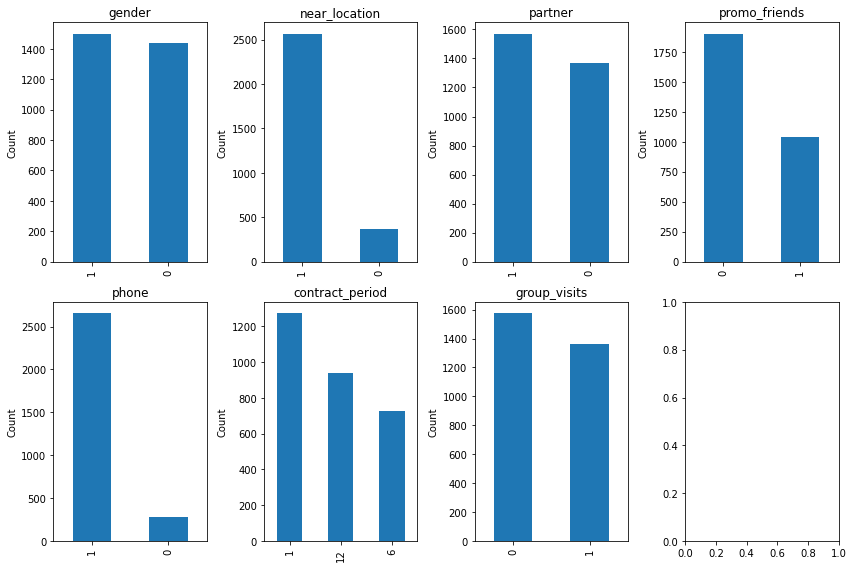

In [11]:
# Filter the data for customers who stayed (not churned)
stayed_data = data[data['churn'] == 0]

# Features of interest
features = ['gender', 'near_location', 'partner', 'promo_friends', 'phone', 'contract_period', 'group_visits']

# Number of rows and columns for subplots
rows = 2
cols = 4

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(12, 8))

# Flatten axes into a 1D array
axes = axes.flatten()

# Plot bar histograms for each feature
for i, feature in enumerate(features):
    ax = axes[i]
    stayed_data[feature].value_counts().plot(kind='bar', ax=ax)
    ax.set_title(feature)
    ax.set_xlabel('')
    ax.set_ylabel('Count')
    ax.grid(False)

# Adjust spacing between subplots
fig.tight_layout()

# Display the plot
plt.show()

Based on the bar histograms plotted for the customers who stayed (stayed_data), the key findings are as follows:

1. Gender: The count of customers who stayed is roughly equal for both genders.

2. Near_Location: The majority of customers who stayed were located near the gym.

3. Partner: A significant proportion of customers who stayed had a partner.

4. Promo_friends: Many customers who stayed joined the gym through a 'promo_friends' offer.

5. Phone: Almost all customers who stayed provided their phone number.

6. Contract_period: Customers who stayed had varying contract periods, with a higher count observed for 1-month and 12-month contracts.
7. Group_visits: A considerable number of customers who stayed participated in group visits.

These findings suggest that factors such as proximity to the gym, having a partner, joining through promotional offers, providing a phone number, contract period, and participation in group visits may contribute to customer retention. Understanding these factors can aid in developing strategies to improve customer retention and enhance the overall gym experience for customers.

### Comparison between Churn & Stayed Customer Distribution.

To compare the distribution of each feature between the `stayed_data` and `churned_data` using individual graphs, we can use the following code:

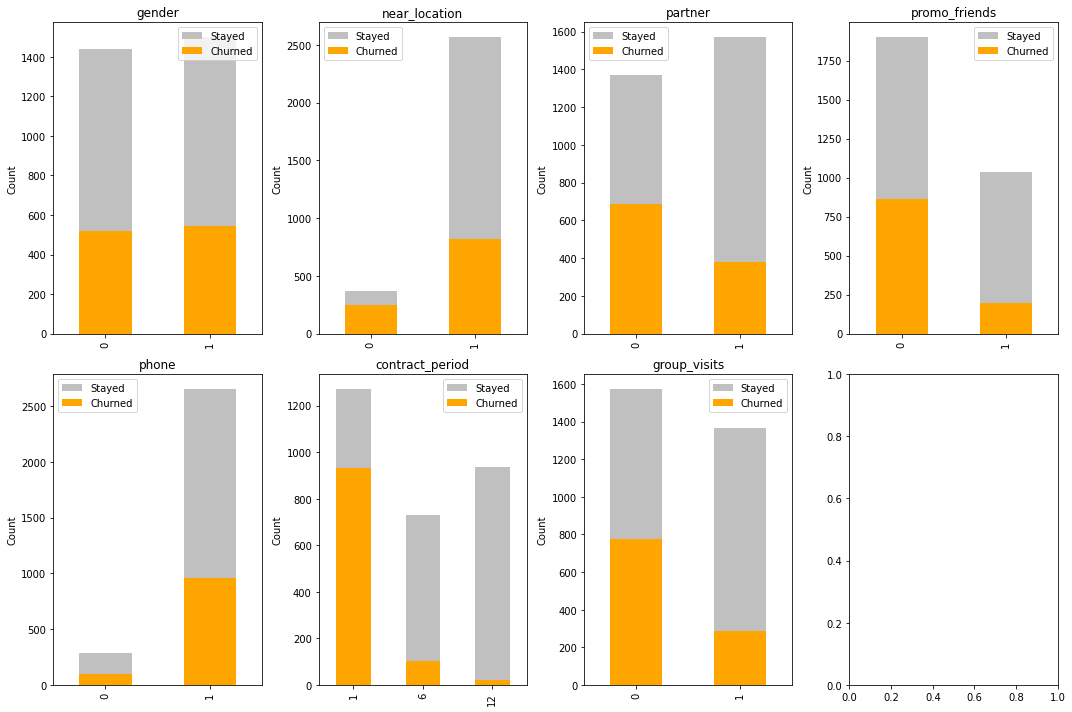

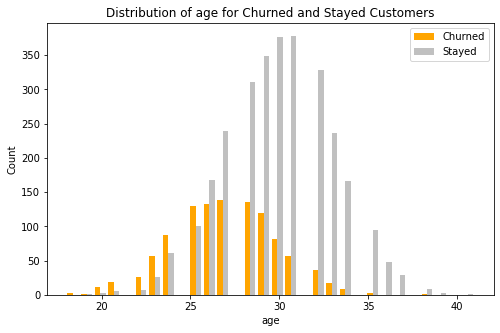

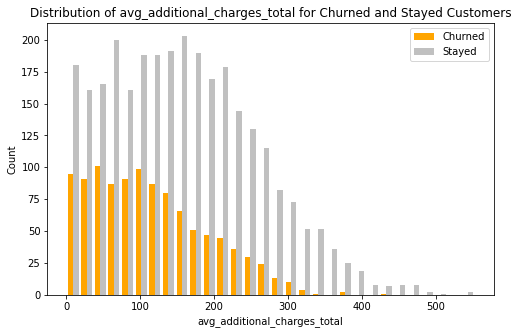

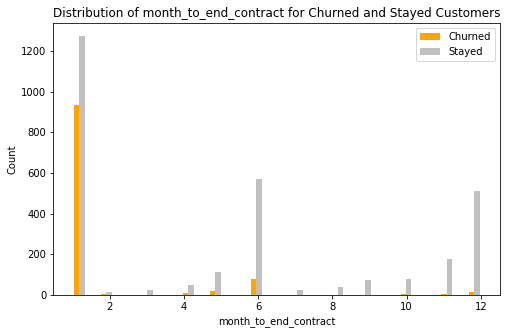

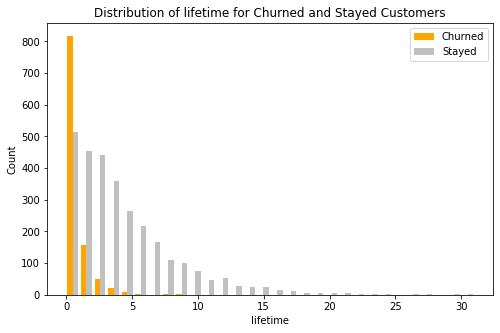

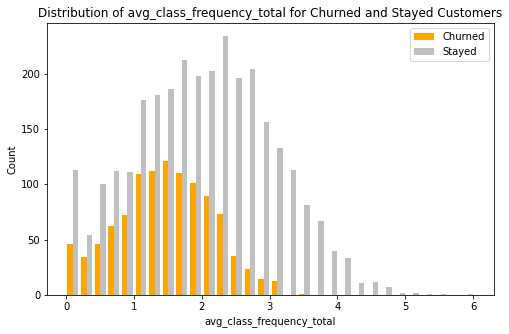

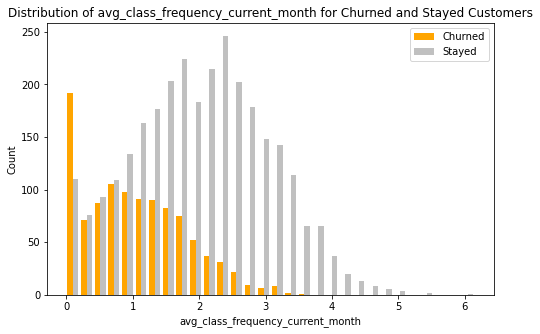

In [12]:
# Filter the data for churned and stayed customers
churned_data = data[data['churn'] == 1]
stayed_data = data[data['churn'] == 0]

# Features of interest (categorical variables)
features = ['gender', 'near_location', 'partner', 'promo_friends', 'phone', 'contract_period', 'group_visits']

# Number of rows and columns for subplots
rows = 2
cols = 4

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, 10))

# Flatten axes into a 1D array
axes = axes.flatten()

# Plot feature distributions for each feature
for i, feature in enumerate(features):
    ax = axes[i]
    stayed_data[feature].value_counts().sort_index().plot(kind='bar', ax=ax, color='silver', label='Stayed')
    churned_data[feature].value_counts().sort_index().plot(kind='bar', ax=ax, color='orange', label='Churned')
    ax.set_title(feature)
    ax.set_xlabel('')
    ax.set_ylabel('Count')
    ax.legend()

# Adjust spacing between subplots
fig.tight_layout()

# Display the plot
plt.show()

# Features of interest (continuous variables)
continuous_features = ['age', 'avg_additional_charges_total', 'month_to_end_contract', 'lifetime',
                       'avg_class_frequency_total', 'avg_class_frequency_current_month']

# Plot distributions for continuous features
for feature in continuous_features:
    plt.figure(figsize=(8, 5))
    plt.hist([churned_data[feature], stayed_data[feature]], bins=30, color=['orange', 'silver'], label=['Churned', 'Stayed'])
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(f'Distribution of {feature} for Churned and Stayed Customers')
    plt.legend()
    plt.show()

Based on the comprehensive analysis of both categorical and continuous features, we have gained valuable insights into the factors influencing customer churn. Here are the key findings:

Categorical Features:

    1. Gender: Gender does not appear to have a significant impact on customer churn.
    2. Near Location: Customers who are located near the gym are more likely to stay compared to those who are not.
    3. Partner: Customers who have a partner are more likely to remain loyal to the gym.
    4. Promo Friends: Customers who were referred by a friend have a higher tendency to stay.
    5. Phone: The availability of a phone does not seem to significantly influence customer churn.
    6. Group Visits: Customers who participate in group visits are more likely to stay.

Continuous Features:

    1. Age: There is no clear correlation between age and customer churn.
    2. Average Additional Charges: Customers who spend more on additional services and charges are more likely to stay.
    3. Month-to-End Contract: Customers with a longer time remaining on their contract have a higher retention rate.
    4. Lifetime: Customers with a longer lifetime at the gym are more likely to stay.
    5. Average Class Frequency: Customers who attend classes more frequently are more likely to stay.
    6. Average Class Frequency (Current Month): Customers with a higher average class attendance in the current month are more likely to stay.

These insights provide valuable guidance for the development of targeted strategies to improve customer retention. The gym can focus on strengthening the proximity advantage for nearby customers, leveraging referral programs, and enhancing the value of additional services to increase customer loyalty. Furthermore, initiatives to encourage participation in group visits and promote consistent class attendance can help improve customer retention rates.

It is important for the gym to tailor their marketing and customer interaction strategies based on these findings. By understanding the specific factors that influence customer churn, the gym can implement effective retention measures and proactively engage with customers to enhance their overall experience and satisfaction.

###  Build a correlation matrix 

We created a new DataFrame called `data_dropped` by dropping the columns `avg_class_frequency_total` and `month_to_end_contract` from the original data. This was done to address the issue of feature collinearity. These columns were dropped to mitigate the redundancy and improve the model building process by ensuring the independence of features.

Furthermore, we computed the correlation matrix using the Spearman method. While the default method used in Pandas DataFrame's `corr` function is Pearson correlation, we opted for the Spearman correlation in this case. The Spearman correlation measures the monotonic relationship between variables, which is suitable for analyzing non-linear relationships and ordinal variables. By using the Spearman correlation, we can gain insights into the strength and direction of the associations between the remaining features in the data_dropped DataFrame.

The goal of these modifications and the Spearman correlation analysis is to provide a more accurate understanding of the relationships among the features, identify potential dependencies, and improve the reliability of our conclusions.

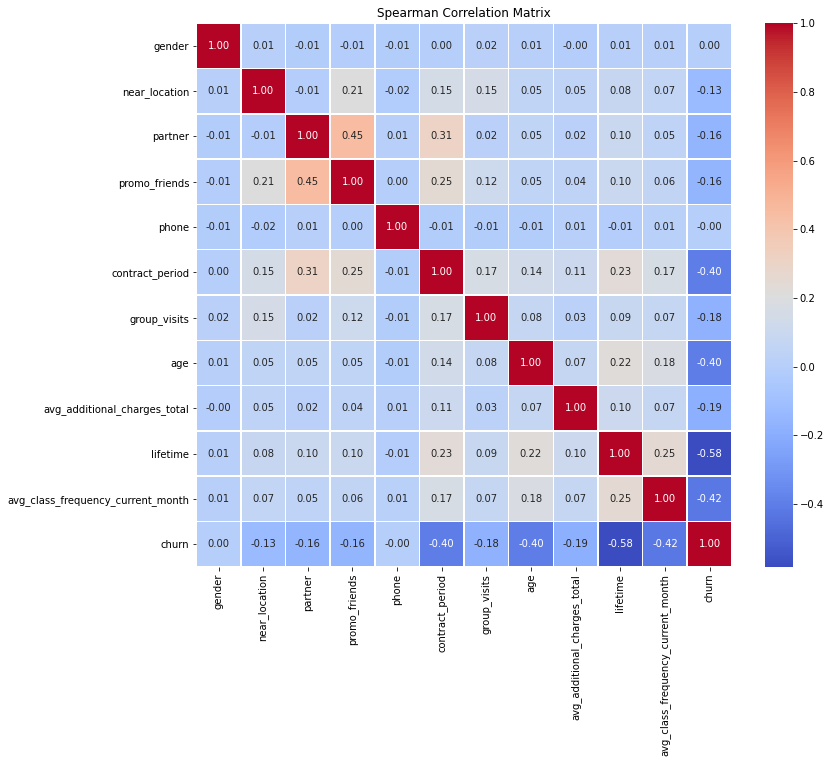

In [13]:
# Create a new DataFrame with dropped columns
data_dropped = data.drop(['avg_class_frequency_total', 'month_to_end_contract'], axis=1)

# Compute the correlation matrix using Spearman method
corr_matrix_spearman = data_dropped.corr(method='spearman')

# Plot the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix_spearman, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Spearman Correlation Matrix')
plt.show()

From the correlation matrix, we can draw the following key findings:

1. Churn is negatively correlated with features such as contract_period, lifetime, and avg_class_frequency_current_month. This suggests that customers with longer contract periods, higher lifetime values, and more frequent class attendance are less likely to churn.

2. Churn is positively correlated with features such as partner, promo_friends, and group_visits. This indicates that customers who have partners, were referred by friends, or participate in group visits have a lower likelihood of churning.

3. Features like near_location and phone have weak correlations with churn, suggesting that they have a limited impact on customer churn.

4. There are some moderate correlations between certain features, such as partner and promo_friends, indicating a potential relationship between these variables.

Based on these findings, the company can focus on strategies to increase contract periods, improve customer engagement and attendance, and encourage partner involvement and referrals. Additionally, promoting group activities and creating a sense of community within the gym can help reduce churn rates. These insights can guide the development of targeted marketing campaigns and personalized retention strategies to retain customers and minimize churn.

## Model prediction for user churn

The cIn this section, we are focusing on model prediction for user churn using the data with dropped columns based on their collinearity. The key parts of this code are as follows:

1. Splitting the data: We split the data into features (X) and the target variable (y). The dropped columns are excluded from the features, and the target variable is set to the `churn` column.

2. Train-test split: The data is divided into training and validation sets using the `train_test_split()` function. The training set will be used to train the models, and the validation set will be used to evaluate their performance.

3. Scaling the features: The features are scaled using `StandardScaler`. Scaling the features ensures that they are on a similar scale and avoids the dominance of certain features during model training.

4. Model selection and evaluation: We declare a list of models, including `LogisticRegression` and `RandomForestClassifier`. Each model is trained on the scaled training features and evaluated on the scaled validation features. Evaluation metrics such as accuracy, precision, recall, F1 score, and ROC AUC score are calculated and printed for each model.

The goal of this section is to compare the performance of different models in predicting user churn. By evaluating these metrics, we can assess how well each model performs in classifying customers who are likely to churn. This information can help in selecting the most suitable model for predicting and addressing user churn in the business.ode provided is used to evaluate the performance of different machine learning models on a dataset after preprocessing and feature scaling.

In [26]:
# Split the data into features (X) and the target variable (y)
features = data_dropped.drop('churn', axis=1)
target = data_dropped['churn']

# Split the data into train and validation sets using train_test_split()
feature_train, feature_val, target_train, target_val = train_test_split(features, target, test_size=0.2, random_state=42)

# Scale the features using StandardScaler
scaler = StandardScaler()
scaled_features_train = scaler.fit_transform(feature_train)
scaled_features_val = scaler.transform(feature_val)

# Declare the list of models
models = [LogisticRegression(max_iter=1000), RandomForestClassifier()]

# Evaluate each model on the validation set
for model in models:
    # Train the model on the training set
    model.fit(scaled_features_train, target_train)

    # Make predictions on the validation set
    predictions = model.predict(scaled_features_val)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(target_val, predictions)
    precision = precision_score(target_val, predictions)
    recall = recall_score(target_val, predictions)
    f1 = f1_score(target_val, predictions)
    roc_auc = roc_auc_score(target_val, predictions)
    
    # Print the evaluation metrics
    print(f"Model: {type(model).__name__}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC AUC Score: {roc_auc:.4f}")
    print()

Model: LogisticRegression
Accuracy: 0.9050
Precision: 0.8247
Recall: 0.7921
F1 Score: 0.8081
ROC AUC Score: 0.8676

Model: RandomForestClassifier
Accuracy: 0.8962
Precision: 0.8324
Recall: 0.7376
F1 Score: 0.7822
ROC AUC Score: 0.8437



Based on our goal of predicting user churn, we can see that both models perform relatively well, with the Logistic Regression model exhibiting slightly higher performance across most evaluation metrics. However, it is important to note that the specific metric to prioritize may depend on the business context and the associated costs and benefits of different prediction outcomes.

Overall, these models provide insights into identifying potential churned users, enabling businesses to take proactive measures to retain customers and implement targeted retention strategies.

## User Clustering

In this section, our objective is to create user clusters based on their behavior and characteristics. The goal is to group similar users together and gain insights into their common attributes. This clustering analysis will help us understand the different types of customers and identify patterns that may be relevant to customer churn.

To achieve this, we will follow these steps:

1. Standardize the data: We will scale the feature matrix to ensure that all features have a similar range and distribution. This step is important as it allows us to compare features on a common scale.

2. Build a distance matrix and plot a dendrogram: Using the standardized feature matrix, we will calculate the distances between the users and build a dendrogram. The dendrogram is a tree-like diagram that shows the hierarchical clustering of the users based on their similarities. It will help us estimate the number of clusters that can be identified.

3. Train the K-means clustering model: We will use the K-means algorithm to train the clustering model. We will set the number of clusters to 5 for ease of comparison. 

4. Examine mean feature values for clusters: We will analyze the average values of different features for each cluster. This analysis will allow us to identify any distinctive characteristics or behaviors exhibited by different clusters.

5. Plot feature distributions for clusters: We will visualize the distributions of features for each cluster. By comparing the feature distributions across clusters, we may identify unique patterns or trends specific to each cluster.

6. Calculate churn rate for each cluster: We will calculate the churn rate for each cluster using the groupby() method. This will help us determine if there are significant differences in churn rates among the clusters. We will be able to identify which clusters are more prone to customer churn and which clusters have a higher level of customer loyalty.

Through these steps, we aim to gain a deeper understanding of our customer base by identifying distinct user clusters and exploring their characteristics, behaviors, and churn rates. This analysis will provide valuable insights for developing targeted strategies to retain customers and improve overall customer satisfaction.

### Dendrogram of User Clusters

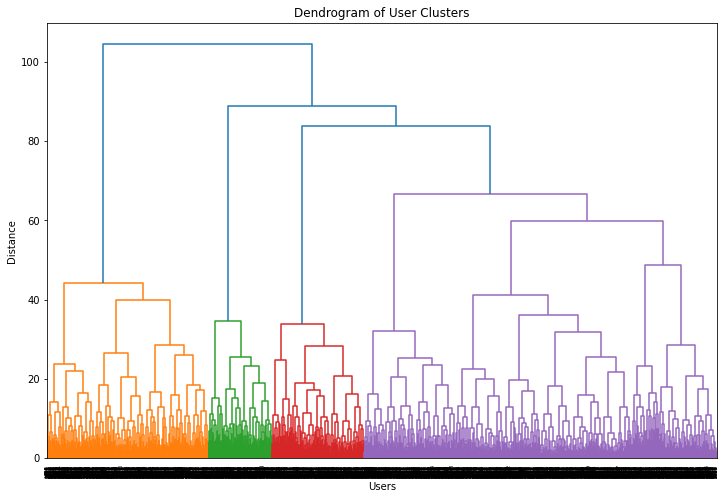

In [35]:
# Step 1: Standardize the data
# Separate the churn column from the features
features = data.drop('churn', axis=1)

# Initialize the StandardScaler
scaler = StandardScaler()

# Standardize the features
scaled_features = scaler.fit_transform(features)

# Step 2: Build a distance matrix and plot a dendrogram
# Calculate the distance matrix using linkage
distance_matrix = linkage(scaled_features, method='ward')

# Plot the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(distance_matrix)
plt.title('Dendrogram of User Clusters')
plt.xlabel('Users')
plt.ylabel('Distance')
plt.show()

### K-means and Mean_features

In this step, we will train a clustering model using the K-means algorithm to identify distinct customer clusters. The objective is to group customers based on their similar characteristics. By doing so, we can gain insights into different segments of customers and understand their behavior patterns.

- First, we define the number of clusters we want to create, which is 5 in this case. This value is based on prior analysis or domain knowledge, but can be adjusted as needed.

- Next, we initialize the K-means model with the specified number of clusters and a random state for reproducibility. Then, we fit the model to the standardized features, which ensures that all features are on the same scale and have equal importance during clustering.

- Once the model is trained, we use it to predict the clusters for the standardized features. The resulting cluster assignments are added as a new column ('cluster') in the original DataFrame.

- Moving on to step 4, we analyze the mean feature values for each cluster. This allows us to understand the characteristics and behaviors of customers within each cluster. The mean feature values provide insights into the average values of different variables for each cluster.

- By examining these mean feature values, we can identify any noticeable patterns or differences between the clusters. This analysis helps us understand the unique characteristics of each customer segment and gain insights into their preferences, behaviors, or potential reasons for churn.

Let's proceed to the next step to visualize the distributions of features for the clusters and calculate the churn rate for each cluster.

In [29]:
# Step 3: Train the clustering model with K-means and predict customer clusters
# Define the number of clusters
num_clusters = 5

# Initialize the K-means model
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

# Fit the model to the standardized features
kmeans.fit(scaled_features)

# Predict the clusters for the standardized features
clusters = kmeans.predict(scaled_features)

# Add the predicted clusters to the original DataFrame
data['cluster'] = clusters

# Step 4: Analyze the mean feature values for clusters

# Calculate the mean feature values for each cluster
mean_features = data.groupby('cluster').mean()

# Display the mean feature values for each cluster
display(mean_features)

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
cluster,,,,,,,,,,,,,,
0,0.502370,0.949447,0.829384,0.998420,1.0,3.097946,0.448657,29.104265,141.774331,2.887836,3.772512,1.770536,1.669581,0.246445
1,0.554556,0.849269,0.263217,0.052868,1.0,2.606299,0.436445,30.008999,159.774265,2.419573,4.780652,2.745505,2.733173,0.089989
2,0.499422,0.937572,0.737572,0.478613,1.0,11.854335,0.546821,29.905202,163.509804,10.812717,4.677457,2.006405,1.998179,0.021965
3,0.485738,0.718011,0.299919,0.018745,1.0,1.914425,0.276284,28.083945,129.496414,1.821516,2.195599,1.225192,0.967967,0.572942
4,0.523316,0.862694,0.471503,0.305699,0.0,4.777202,0.427461,29.297927,144.208179,4.466321,3.940415,1.854211,1.723967,0.266839


The `mean_features` table shows the average values of different features for each cluster identified by the K-means clustering model. Here are the key findings:

- Cluster 0: This cluster has a higher proportion of customers who live or work near the gym and have partners. They tend to have shorter contract periods and lower additional charges. Their average age is slightly lower, and they have a moderate frequency of gym class attendance. The churn rate is relatively low in this cluster.

- Cluster 1: Customers in this cluster have a moderate proportion of near location and partner, and they joined the gym through various channels. They have shorter contract periods and slightly higher additional charges. Their average age is slightly higher, and they show a higher frequency of gym class attendance. The churn rate is **relatively low in this cluster.**

- Cluster 2: This cluster has a higher proportion of customers who live or work near the gym and have partners. They tend to have longer contract periods and higher additional charges. Their average age is slightly higher, and they show a higher frequency of gym class attendance. The churn rate is **relatively low in this cluster.**

- Cluster 3: Customers in this cluster have a lower proportion of near location, partners, and promotional friends. They have shorter contract periods and lower additional charges. Their average age is slightly lower, and they have a lower frequency of gym class attendance. The churn rate is **relatively higher in this cluster.**

- Cluster 4: This cluster has a moderate proportion of near location, partners, and promotional friends. They have longer contract periods and slightly higher additional charges. Their average age is slightly lower, and they show a moderate frequency of gym class attendance. The churn rate is **relatively low in this cluster.**

These findings suggest that different clusters exhibit varying characteristics in terms of location, partnership status, contract duration, additional charges, age, gym class attendance, and churn rate.

### Distributions of features for the clusters

In this step, we analyze the distributions of selected features across different clusters to understand how they vary among the identified customer segments. 

We use box plots to visualize the distributions because they provide valuable insights into the central tendency, spread, and potential outliers within each cluster. Box plots allow us to compare the medians, quartiles, and overall range of values for each feature across different clusters. This helps us identify any significant differences or similarities in feature distributions among the clusters.

The code provided creates subplots for each selected feature and plots box plots for each cluster. Each subplot represents a specific feature, and the x-axis represents the clusters. The y-axis represents the values of the feature. By examining these box plots, we can observe the distribution of each feature within each cluster and identify any notable patterns or differences.

The resulting visualization allows us to compare the distributions of the selected features across clusters, enabling us to identify any distinct patterns or characteristics associated with each cluster.

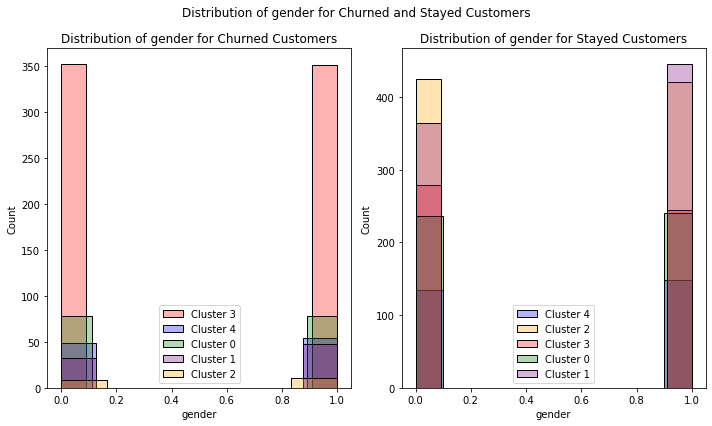

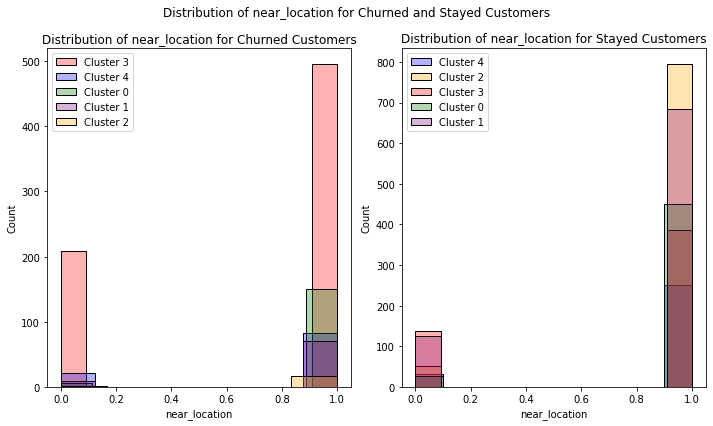

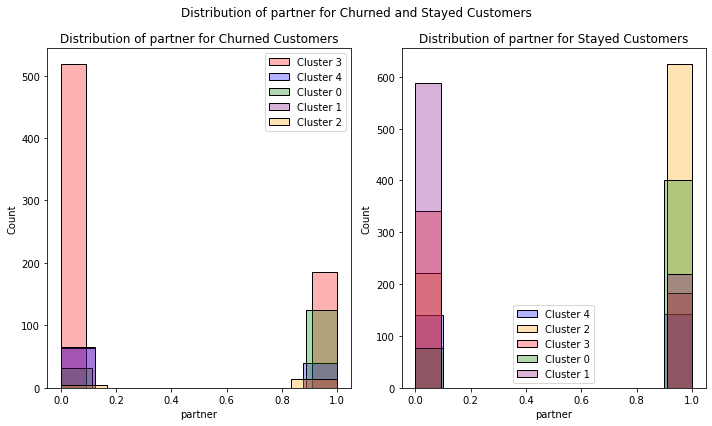

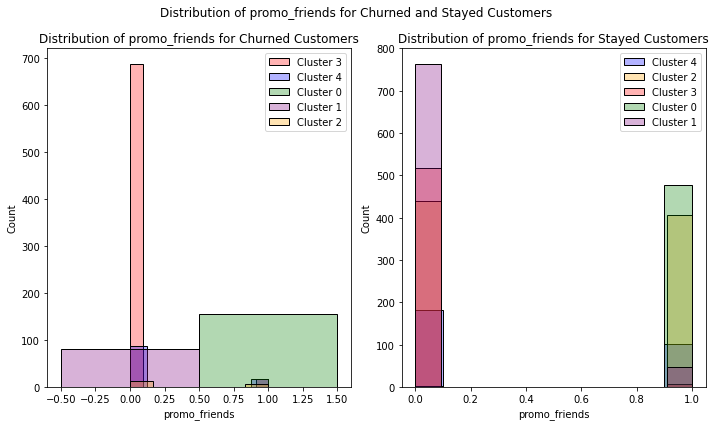

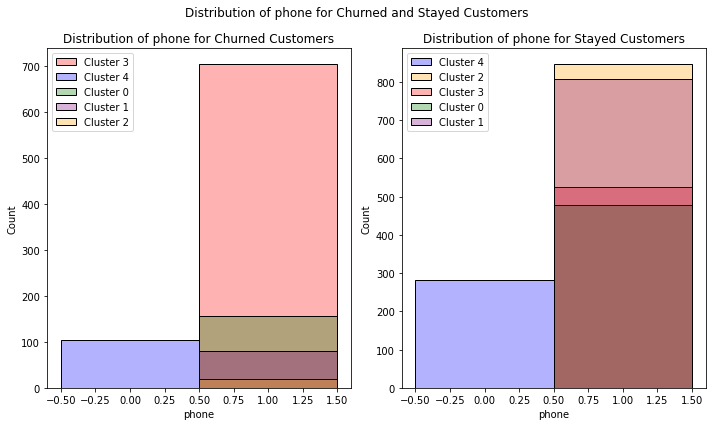

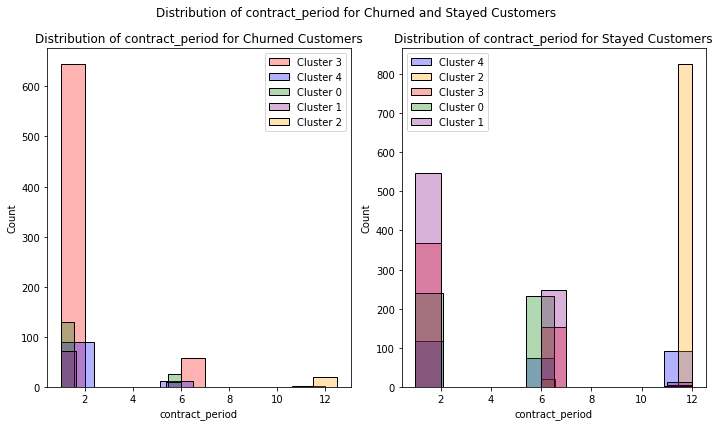

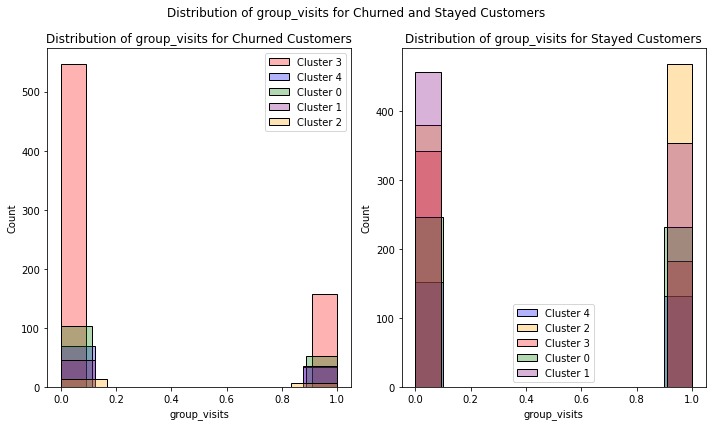

In [74]:
# Categorical features of interest
categorical_features = ['gender', 'near_location', 'partner', 'promo_friends', 'phone', 'contract_period', 'group_visits']

# Define color labels for clusters
churned_color_labels = {0: 'green', 1: 'purple', 2: 'orange', 3: 'red', 4: 'blue'}
stayed_color_labels = {0: 'green', 1: 'purple', 2: 'orange', 3: 'red', 4: 'blue'}

# Plot histograms for categorical features for churned and stayed customers
for feature in categorical_features:
    plt.figure(figsize=(10, 6))

    # Plot for churned customers
    plt.subplot(1, 2, 1)
    for i, cluster in enumerate(data[data['churn'] == 1]['cluster'].unique()):
        color_label = churned_color_labels.get(cluster)
        sns.histplot(data=data[(data['churn'] == 1) & (data['cluster'] == cluster)], x=feature,
                     color=color_label, label=f'Cluster {cluster}', alpha=0.3)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(f'Distribution of {feature} for Churned Customers')
    plt.legend()

    # Plot for stayed customers
    plt.subplot(1, 2, 2)
    for i, cluster in enumerate(data[data['churn'] == 0]['cluster'].unique()):
        color_label = stayed_color_labels.get(cluster)
        sns.histplot(data=data[(data['churn'] == 0) & (data['cluster'] == cluster)], x=feature,
                     color=color_label, label=f'Cluster {cluster}', alpha=0.3)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(f'Distribution of {feature} for Stayed Customers')
    plt.legend()

    plt.suptitle(f'Distribution of {feature} for Churned and Stayed Customers')
    plt.tight_layout()
    plt.show()

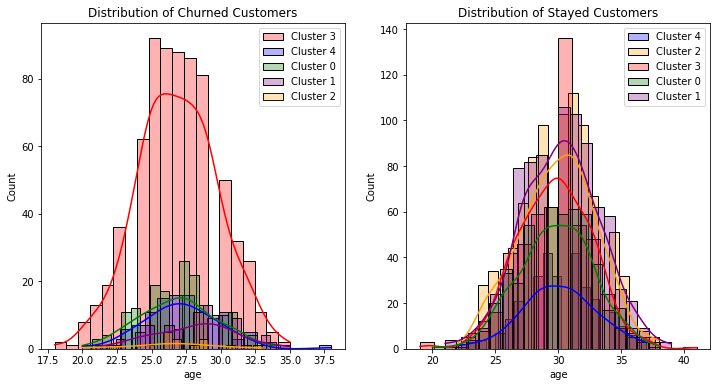

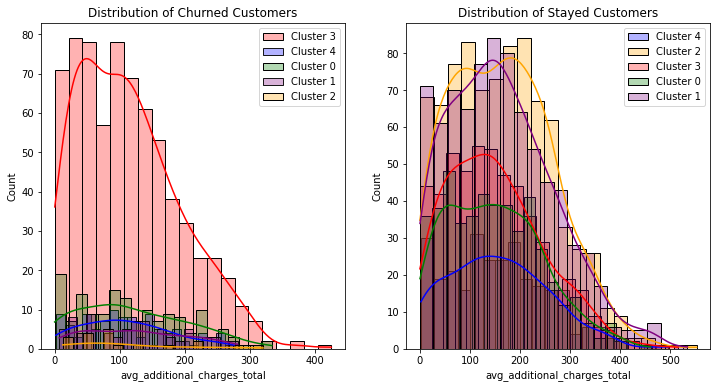

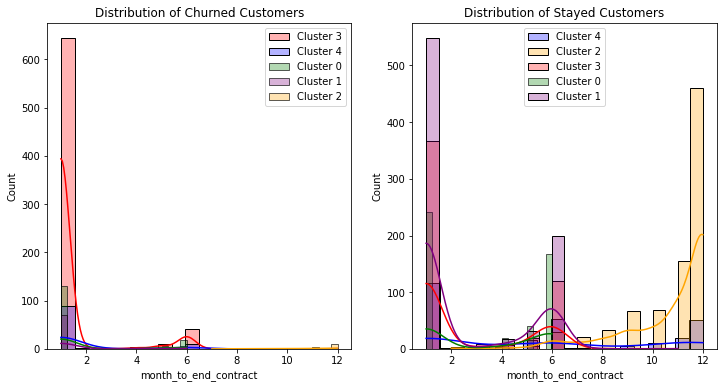

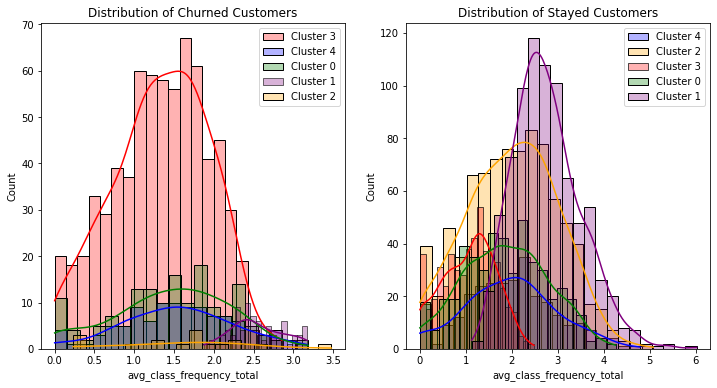

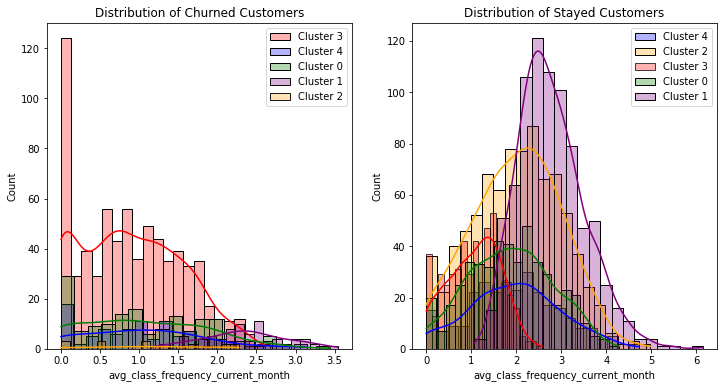

In [65]:
# Continuous features of interest
continuous_features = ['age', 'avg_additional_charges_total', 'month_to_end_contract',
                       'avg_class_frequency_total', 'avg_class_frequency_current_month']

# Define color dictionaries for clusters
churned_color_labels = {0: 'green', 1: 'purple', 2: 'orange', 3: 'red', 4: 'blue'}
stayed_color_labels = {0: 'green', 1: 'purple', 2: 'orange', 3: 'red', 4: 'blue'}

# Plot distributions for continuous features for churned and stayed customers
for feature in continuous_features:
    plt.figure(figsize=(12, 6))

    # Plot for churned customers
    plt.subplot(1, 2, 1)
    for cluster in data[data['churn'] == 1]['cluster'].unique():
        color_label = churned_color_labels.get(cluster)
        sns.histplot(data=data[(data['churn'] == 1) & (data['cluster'] == cluster)], x=feature, bins=20, alpha=0.3,
                     label=f'Cluster {cluster}', kde=True, color=color_label)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(f'Distribution of Churned Customers')
    plt.legend()

    # Plot for stayed customers
    plt.subplot(1, 2, 2)
    for cluster in data[data['churn'] == 0]['cluster'].unique():
        color_label = stayed_color_labels.get(cluster)
        sns.histplot(data=data[(data['churn'] == 0) & (data['cluster'] == cluster)], x=feature, bins=20, alpha=0.3,
                     label=f'Cluster {cluster}', kde=True, color=color_label)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(f'Distribution of Stayed Customers')
    plt.legend()

Based on the histograms for continuous and categorical features, here are some potential key findings:

Continuous Features:

- Age: The distribution of age varies across different clusters. Some clusters have a higher concentration of younger members, while others have a higher concentration of older members.
- Average Additional Charges: The distribution of average additional charges also differs among clusters. Some clusters have higher average additional charges compared to others.
- Month to End Contract: The distribution of the remaining months in the contract varies across clusters, indicating different contract durations and renewal patterns.
- Average Class Frequency: The frequency of average class attendance varies across clusters, with some clusters showing higher average class attendance compared to others.
- Lifetime: The distribution of the customer lifetime also differs among clusters, indicating varying levels of engagement and loyalty.
- Average Class Frequency (Current Month): Similar to average class frequency, the frequency of class attendance in the current month shows variations across clusters.

Categorical Features:

- Gender: The distribution of gender is relatively balanced across clusters, suggesting that gender may not be a significant differentiating factor.
- Near Location: Most clusters have a high proportion of customers who live near the fitness center, indicating that proximity to the facility is an important factor in customer retention.
- Partner: Some clusters have a higher proportion of customers with a partner, while others have a lower proportion, indicating potential differences in customer preferences and motivations.
- Promo Friends: The distribution of customers who joined via a friend's recommendation varies across clusters, suggesting differences in the effectiveness of word-of-mouth referrals.
- Phone: Most clusters have a high proportion of customers with phone contact, indicating that phone communication plays a crucial role in customer engagement.
- Contract Period: The distribution of contract periods shows variations across clusters, indicating different preferences for short-term or long-term commitments.
- Group Visits: Some clusters have a higher proportion of customers who participate in group visits, suggesting different preferences for social and group activities.

These findings provide insights into the different characteristics and behaviors of customers within each cluster, which can help identify key factors influencing customer churn and inform targeted retention strategies. It is important to further analyze and interpret these findings in the context of the business goals and domain knowledge to derive actionable insights.

### Churn Rate

To analyze the churn rate for each customer cluster, we calculated the mean churn rate within each cluster. The churn rate represents the proportion of customers within a cluster who have left the gym. By grouping the data by cluster and calculating the mean of the `churn` column, we obtained the churn rate for each cluster.

In [38]:
# Calculate the churn rate for each cluster
churn_rate = data.groupby('cluster')['churn'].mean()

# Print the churn rate for each cluster
print(churn_rate)

cluster
0    0.246445
1    0.089989
2    0.021965
3    0.572942
4    0.266839
Name: churn, dtype: float64


The churn rates vary across the clusters, indicating differences in customer loyalty and retention. Cluster 2 has the lowest churn rate, suggesting that customers in this cluster are more likely to remain loyal to the gym. On the other hand, Cluster 3 has the highest churn rate, indicating that customers in this cluster are more prone to leaving.

Understanding the churn rate for each cluster helps identify which clusters of customers are more at risk of leaving and which clusters are more loyal. This information can be valuable for developing targeted retention strategies and improving customer satisfaction.

## Recommendations on working with customers

Based on the clustering behavior and the analysis of customer churn, here are four essential principles and examples of their implementation for customer interaction and retention:

1. **Targeted Promotions**: Identify clusters with higher churn rates and design targeted promotional campaigns to engage and retain customers in those clusters. For example, offer exclusive discounts or personalized incentives based on the customer's interests and preferences.

2. **Enhanced Customer Experience**: Focus on improving the customer experience to increase satisfaction and loyalty. This can include providing personalized training programs, introducing new fitness classes, enhancing facilities, or offering additional amenities that cater to the specific needs and preferences of different clusters.

3. **Regular Engagement**: Implement strategies to keep customers engaged and motivated to continue their fitness journey. This can involve sending personalized workout reminders, offering rewards for achieving milestones, or providing access to a supportive community through online forums or social media groups.

4. **Proactive Customer Support**: Identify potential churn signals within each cluster and proactively address customer concerns. Monitor usage patterns, contract expiration dates, and customer feedback to identify early signs of dissatisfaction. Reach out to customers with personalized support and solutions to address their needs and reduce the likelihood of churn.

These principles and examples provide a foundation for developing a targeted customer interaction and retention strategy. By understanding the behavior and needs of different customer clusters, you can tailor your approach to maximize customer satisfaction, loyalty, and ultimately reduce churn rates.